# DNN 시작

## 라이브러리 로딩하기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 

from keras.datasets import cifar10

Using TensorFlow backend.


## 데이터 불러오기

In [2]:
NUM_CLASS = 10

In [3]:
# keras에서 제공하는 cifar10 데이터 불러오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
# 이미지 데이터 정규화
# keras 모델을 돌릴때 이미지 픽셀값이 -1 ~ 1 사이에 있어야지 성능이 좋음
# y 데이터는 to_catagorical 함수를 이용하여 one-hot 인코딩 시켜줌
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASS)
y_test = to_categorical(y_test, NUM_CLASS)

# 모델 구성하기

In [5]:
# keras에서 제공하는 Sequential 모델을 활용하여 모델 구성해보기
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential([
    Dense(200, activation = 'relu', input_shape = (32,32,3)),
    Flatten(),
    Dense(150, activation = 'relu'),
    Dense(10, activation = 'softmax'),
])

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32, 32, 200)       800       
_________________________________________________________________
flatten_1 (Flatten)          (None, 204800)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30720150  
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 30,722,460
Trainable params: 30,722,460
Non-trainable params: 0
_________________________________________________________________


하지만 이 방식을 사용하게 되면, input layer를 여러가지로 구성할 수 없거나, 유연성이 없는 모델이 될 가능성이 높습니다.  
따라서 함수형 API를 사용하여 모델 네트워크를 구성하는 방법이 더 권장되는 것으로 알려져 있습니다.  
이제 저는 공부를 진행할 때, 함수형 API를 이용하여 모델을 구성해보도록 하겠습니다.

In [7]:
input_layer = Input((32,32,3))

layer_1 = Flatten()(input_layer)

layer_2 = Dense(200, activation = 'relu')(layer_1)
layer_3 = Dense(150, activation = 'relu')(layer_2)

output_layer = Dense(NUM_CLASS, activation = 'softmax')(layer_3)

model = Model(input_layer, output_layer)

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_5 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


## 모델 컴파일

In [9]:
optimizer = Adam(lr=0.0005)
model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

## 모델 훈련

In [10]:
model.fit(x_train,
         y_train,
         batch_size=32,
         epochs=10,
         shuffle=False)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
50000/50000 [==============================] - 28s 556us/step - loss: 1.8502 - acc: 0.33380s - loss: 1.8533 -
Epoch 2/10
50000/50000 [==============================] - 25s 499us/step - loss: 1.6690 - acc: 0.40280s - loss: 1.6703 - acc:
Epoch 3/10
50000/50000 [==============================] - 25s 493us/step - loss: 1.5909 - acc: 0.4340
Epoch 4/10
50000/50000 [==============================] - 25s 499us/step - loss: 1.5365 - acc: 0.4547
Epoch 5/10
50000/50000 [==============================] - 25s 493us/step - loss: 1.4935 - acc: 0.4685
Epoch 6/10
50000/50000 [==============================] - 25s 499us/step - loss: 1.4587 - acc: 0.4824
Epoch 7/10
50000/50000 [==============================] - 25s 502us/step - loss: 1.4297 - acc: 0.4920
Epoch 8/10
50000/50000 [==============================] - 25s 500us/step - loss: 1.4042 - acc: 0.5022
Epoch 9/10
50000/50000 [==============================] - 25s 505us/step - loss: 1.3835 - acc

## 모델 평가

In [11]:
# 결과는 [loss, accuracy] 값으로 반환 됨
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 78us/step


[1.4380527465820312, 0.4966]

In [12]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

pred = model.predict(x_test)
pred_single = CLASSES[np.argmax(pred, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

In [13]:
pred_single

array(['cat', 'truck', 'ship', ..., 'cat', 'bird', 'horse'], dtype='<U10')

In [14]:
actual_single

array(['cat', 'ship', 'ship', ..., 'dog', 'automobile', 'horse'],
      dtype='<U10')

In [15]:
show_n = 10
indices = np.random.choice(range(len(x_test)),show_n)

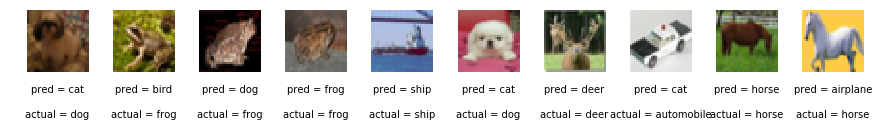

In [16]:
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, show_n, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(pred_single[idx]), fontsize=10, ha ='center', transform = ax.transAxes)
    ax.text(0.5, -0.75, 'actual = ' + str(actual_single[idx]), fontsize=10, ha ='center', transform = ax.transAxes)
    ax.imshow(img)